In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

darknet.zip  yolov3  YOLOv3.ipynb


In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		       generate_train.py  obj.names  yolov3_custom.cfg
convert_xml_to_txt.py  obj.data		  obj.zip


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/darknet.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../darknet.zip 

Archive:  ../darknet.zip
   creating: darknet/
   creating: darknet/.circleci/
  inflating: darknet/.circleci/config.yml  
   creating: darknet/.github/
  inflating: darknet/.github/FUNDING.yml  
   creating: darknet/.github/ISSUE_TEMPLATE/
  inflating: darknet/.github/ISSUE_TEMPLATE/any-other-question-or-issue.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/bug-report-or-training-issue-.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/bug-report.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/feature_request.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/training-issue---no-detections---nan-avg-loss---low-accuracy.md  
   creating: darknet/.github/workflows/
  inflating: darknet/.github/workflows/ccpp.yml  
  inflating: darknet/.gitignore      
  inflating: darknet/.travis.yml     
   creating: darknet/3rdparty/
   creating: darknet/3rdparty/pthreads/
   creating: darknet/3rdparty/pthreads/bin/
  inflating: darknet/3rdparty/pthreads/bin/pthreadGC2.dll  
  inflating: darknet/3rdpar

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/00001.jpg      
  inflating: data/obj/00001.txt      
  inflating: data/obj/00002.jpg      
  inflating: data/obj/00002.txt      
  inflating: data/obj/00003.jpg      
  inflating: data/obj/00003.txt      
  inflating: data/obj/00004.jpg      
  inflating: data/obj/00004.txt      
  inflating: data/obj/00005.jpg      
  inflating: data/obj/00005.txt      
  inflating: data/obj/00006.jpg      
  inflating: data/obj/00006.txt      
  inflating: data/obj/00007.jpg      
  inflating: data/obj/00007.txt      
  inflating: data/obj/00009.jpg      
  inflating: data/obj/00009.txt      
  inflating: data/obj/00010.jpg      
  inflating: data/obj/00010.txt      
  inflating: data/obj/00011.jpg      
  inflating: data/obj/00011.txt      
  inflating: data/obj/00012.jpg      
  inflating: data/obj/00012.txt      
  inflating: data/obj/00013.jpg      
  inflating: data/obj/00013.txt      
  inflating: data/obj/00014.jpg      
  infl

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Now we simply run the python script to do all the work for us.

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
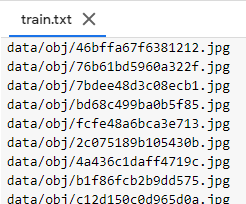

It will contain one line for each training image path.

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Dec 15 2020 - 13:22:47 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Bad file descriptor
darknet: ./src/utils.c:326: error: Assertion `0' failed.


You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
download ('chart.png')

FileNotFoundError: ignored